In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# importing the data and looking at the structure
df = pd.read_csv('/content/banana_quality_dataset.csv')
df.head()

sample_id    variety     region  quality_score quality_category  \
0          1    Manzano   Colombia           1.88       Processing   
1          2   Plantain  Guatemala           2.42       Processing   
2          3      Burro    Ecuador           3.57          Premium   
3          4    Manzano    Ecuador           2.21       Processing   
4          5  Red Dacca    Ecuador           2.35       Processing   

   ripeness_index ripeness_category  sugar_content_brix  firmness_kgf  \
0            2.11           Turning               16.83          3.53   
1            4.25              Ripe               16.73          4.09   
2            6.24          Overripe               21.34          1.63   
3            5.39              Ripe               16.75          3.31   
4            5.84              Ripe               16.90          3.07   

   length_cm  weight_g harvest_date  tree_age_years  altitude_m  rainfall_mm  \
0      21.44    146.92   16-10-2023            13.7        58.2       2440.5   
1      26.11    160.48   14-10-2023             5.1       280.2       2374.6   
2      25.20    225.27   08-09-2023            17.7      1246.9       1191.5   
3      13.08    137.80   07-10-2023            13.0      1150.2       2845.1   
4      12.98    227.84   02-10-2023             4.8       526.0       2136.9   

   soil_nitrogen_ppm  
0              183.6  
1              109.8  
2              147.7  
3               92.8  
4              129.7

In [3]:
# dropping the sample_id as it is redundant.
df.drop(columns = 'sample_id', inplace = True)

In [4]:
# Looking at summary statistics of numeric columns
df.describe().round(2).to_csv('Describe.csv')
df.describe()

quality_score  ripeness_index  sugar_content_brix  firmness_kgf  \
count    1000.000000     1000.000000         1000.000000   1000.000000   
mean        2.465160        4.042170           18.516830      2.706840   
std         0.540909        1.753211            2.034812      1.289252   
min         0.920000        1.020000           15.000000      0.500000   
25%         2.090000        2.447500           16.827500      1.590000   
50%         2.440000        4.110000           18.500000      2.680000   
75%         2.850000        5.562500           20.312500      3.820000   
max         3.890000        7.000000           21.980000      5.000000   

         length_cm     weight_g  tree_age_years   altitude_m  rainfall_mm  \
count  1000.000000  1000.000000     1000.000000  1000.000000  1000.000000   
mean     19.882100   164.738930       10.879600   723.556700  1972.992800   
std       5.736318    49.163073        5.215554   427.372855   564.467912   
min      10.000000    81.050000        2.000000     0.400000  1000.500000   
25%      14.902500   122.397500        6.300000   353.950000  1498.750000   
50%      19.890000   163.365000       10.700000   726.000000  1957.400000   
75%      24.800000   205.775000       15.600000  1071.725000  2431.800000   
max      29.950000   249.890000       20.000000  1498.400000  2992.000000   

       soil_nitrogen_ppm  
count        1000.000000  
mean          104.391300  
std            53.607794  
min            10.000000  
25%            60.150000  
50%           104.100000  
75%           149.850000  
max           199.900000

No missing values or outliers are observed in the data.

In [5]:
#Checking the datatype of all features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   variety             1000 non-null   object 
 1   region              1000 non-null   object 
 2   quality_score       1000 non-null   float64
 3   quality_category    1000 non-null   object 
 4   ripeness_index      1000 non-null   float64
 5   ripeness_category   1000 non-null   object 
 6   sugar_content_brix  1000 non-null   float64
 7   firmness_kgf        1000 non-null   float64
 8   length_cm           1000 non-null   float64
 9   weight_g            1000 non-null   float64
 10  harvest_date        1000 non-null   object 
 11  tree_age_years      1000 non-null   float64
 12  altitude_m          1000 non-null   float64
 13  rainfall_mm         1000 non-null   float64
 14  soil_nitrogen_ppm   1000 non-null   float64
dtypes: float64(10), object(5)
memory usage: 117.3+ KB


In [6]:
# Extracting month and day from the date column to use further in analysis
df['harvest_date'] = pd.to_datetime(df['harvest_date'], format = '%d-%m-%Y')
df['month'] = df['harvest_date'].dt.month
df['day'] = df['harvest_date'].dt.day

In [7]:
# Looking at total values from each month to understand data distribution
df['month'].value_counts()

month
10    505
9     495
Name: count, dtype: int64

In [8]:
# Looking at any relation between rainfall and ripeness across dates.
df_rain_ripe = df.groupby(['region','month','day'], as_index = False)[['rainfall_mm','ripeness_index']].mean().round(2)
df_rain_ripe.iloc[:,1:].corr()

month       day  rainfall_mm  ripeness_index
month           1.000000  0.005847     0.004645       -0.014451
day             0.005847  1.000000     0.006174       -0.053419
rainfall_mm     0.004645  0.006174     1.000000        0.032426
ripeness_index -0.014451 -0.053419     0.032426        1.000000

In [9]:
# Creating an average rainfall across countries dataframe to plot it
df_rainfall = df.groupby('region', as_index = False)['rainfall_mm'].mean()
df_rainfall = pd.DataFrame(df_rainfall)
df_rainfall

region  rainfall_mm
0       Brazil  1989.186538
1     Colombia  2016.675735
2   Costa Rica  1973.992308
3      Ecuador  1914.248905
4    Guatemala  1907.762698
5     Honduras  2002.342056
6        India  2029.910526
7  Philippines  1955.681890

In [10]:
# Average rainfall across countries
fig = px.choropleth(df_rainfall, locations = 'region', locationmode = 'country names', color = 'rainfall_mm', color_continuous_scale = 'viridis')

fig.update_layout(title = dict(text = 'Fig 2. Average rainfall by Country', y = 0.95, x= 0.5, xanchor = 'center', yanchor = 'top'),
                  title_font = dict(size = 30, color = 'black'),
                  width = 750,
                  height = 500,
                  coloraxis_colorbar = dict(title = dict(text = 'Rainfall (mm)', font = dict(size = 20, color = 'black'))))

fig.show()

The average rainfall in regions differ only by few 100 mm from each other, so we can't identify as significant influence of it on variety and quality of bananas.

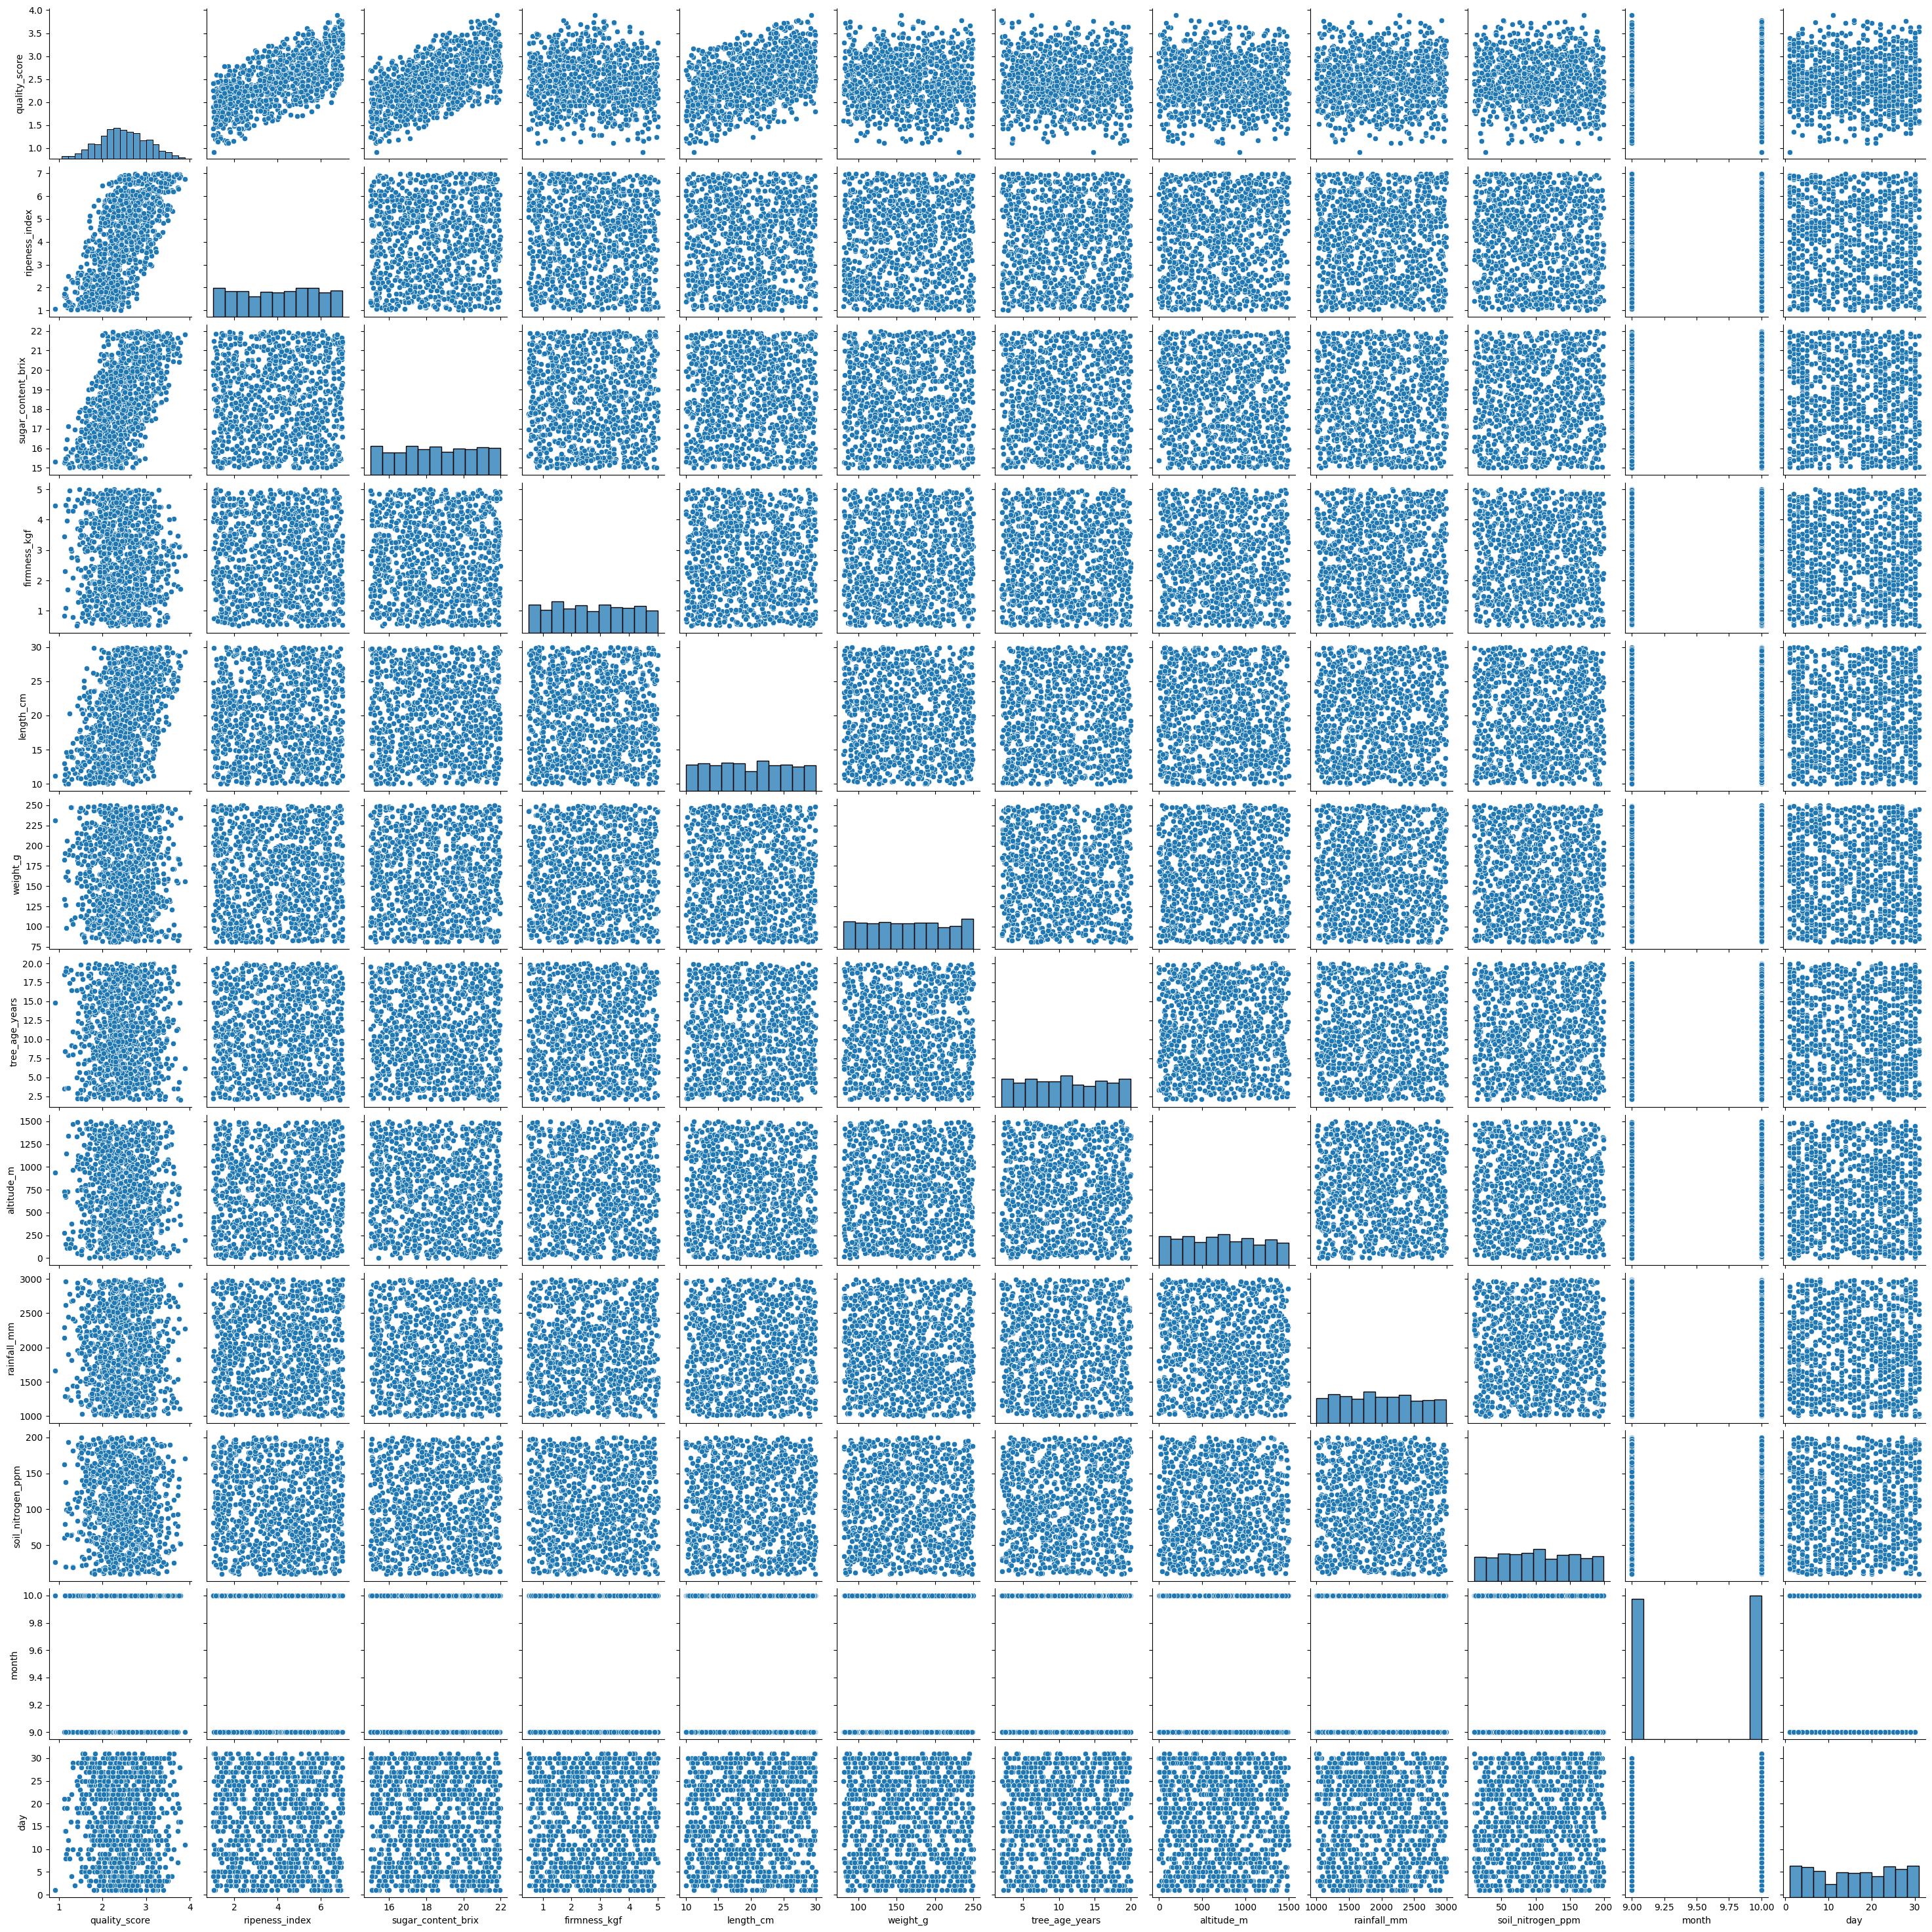

In [11]:
# Pairplot will help us observe any obvious relation between the variables and their trends
sns.pairplot(df)

Quality score has relations with some of the other variables. Apart from this, no significant trend is observed between any pair of variables.

In [12]:
# Understanding the quality and ripeness distribution based on region and variety
pd.set_option('display.max_rows', 70)
df.groupby(['region','variety'], as_index = False)[['ripeness_index', 'quality_score']].mean()

region      variety  ripeness_index  quality_score
0        Brazil    Blue Java        4.230909       2.410000
1        Brazil        Burro        4.148333       2.379167
2        Brazil    Cavendish        4.771538       2.718462
3        Brazil         Fehi        4.235000       2.529444
4        Brazil  Lady Finger        4.791538       2.667692
5        Brazil      Manzano        4.031667       2.330000
6        Brazil     Plantain        4.134667       2.616667
7        Brazil    Red Dacca        3.438000       2.271000
8      Colombia    Blue Java        4.750000       2.634444
9      Colombia        Burro        4.567917       2.668333
10     Colombia    Cavendish        3.913333       2.165556
11     Colombia         Fehi        3.838889       2.461667
12     Colombia  Lady Finger        3.922941       2.404706
13     Colombia      Manzano        4.062105       2.427895
14     Colombia     Plantain        4.067222       2.485556
15     Colombia    Red Dacca        2.973077       2.436923
16   Costa Rica    Blue Java        3.951176       2.655882
17   Costa Rica        Burro        4.716667       2.745833
18   Costa Rica    Cavendish        4.136429       2.530000
19   Costa Rica         Fehi        4.241667       2.480556
20   Costa Rica  Lady Finger        4.583158       2.726842
21   Costa Rica      Manzano        3.936842       2.448947
22   Costa Rica     Plantain        3.643684       2.321579
23   Costa Rica    Red Dacca        3.725000       2.207500
24      Ecuador    Blue Java        3.916190       2.219524
25      Ecuador        Burro        3.525333       2.476667
26      Ecuador    Cavendish        3.953333       2.516000
27      Ecuador         Fehi        3.640000       2.182353
28      Ecuador  Lady Finger        4.671250       2.508750
29      Ecuador      Manzano        3.585000       2.242857
30      Ecuador     Plantain        4.293125       2.483125
31      Ecuador    Red Dacca        4.264348       2.486522
32    Guatemala    Blue Java        4.404000       2.684000
33    Guatemala        Burro        3.410500       2.420500
34    Guatemala    Cavendish        3.992143       2.404286
35    Guatemala         Fehi        3.887143       2.395714
36    Guatemala  Lady Finger        3.427333       2.344000
37    Guatemala      Manzano        4.047143       2.594286
38    Guatemala     Plantain        4.169231       2.503846
39    Guatemala    Red Dacca        4.209231       2.455385
40     Honduras    Blue Java        4.600769       2.642308
41     Honduras        Burro        3.646667       2.283333
42     Honduras    Cavendish        3.837500       2.305833
43     Honduras         Fehi        4.493333       2.591111
44     Honduras  Lady Finger        4.404000       2.484000
45     Honduras      Manzano        4.385833       2.474167
46     Honduras     Plantain        3.858947       2.385263
47     Honduras    Red Dacca        4.229286       2.734286
48        India    Blue Java        3.818462       2.516923
49        India        Burro        4.095500       2.491500
50        India    Cavendish        3.883077       2.546923
51        India         Fehi        3.597000       2.191000
52        India  Lady Finger        3.947500       2.693333
53        India      Manzano        3.259444       2.393889
54        India     Plantain        4.599524       2.609048
55        India    Red Dacca        4.124375       2.481250
56  Philippines    Blue Java        4.495263       2.590000
57  Philippines        Burro        4.243846       2.456923
58  Philippines    Cavendish        4.004500       2.400500
59  Philippines         Fehi        4.265556       2.589444
60  Philippines  Lady Finger        4.088667       2.428000
61  Philippines      Manzano        2.906111       2.297222
62  Philippines     Plantain        3.785833       2.218333
63  Philippines    Red Dacca        4.088333       2.452500

There is no observable distinction in Quality and ripeness values with respect to region and variety, all values occur within a range.

In [13]:
# understanding the quality categorization based on quality score.
df_quality = df.groupby('quality_category')['quality_score'].agg(['min', 'mean', 'max'])
df_quality.sort_values(by = 'min', ascending = True).reset_index()

quality_category   min      mean   max
0           Unripe  0.92  1.320571  1.50
1       Processing  1.51  2.111126  2.50
2             Good  2.51  2.902327  3.50
3          Premium  3.51  3.644000  3.89

We clearly see how Quality is categorized based on the score.
1. < 1.5      Unripe
2. 1.51 - 2.5 Processing
3. 2.51 - 3.5 Good
4. 3.51 >     Premium

In [14]:
# understanding the ripeness categorization based on ripeness_index.
df_quality_ripe = df.groupby('ripeness_category')['ripeness_index'].agg(['min', 'mean', 'max'])
df_quality_ripe.sort_values(by = 'min', ascending = True).reset_index()

ripeness_category   min      mean   max
0             Green  1.02  1.499310  2.00
1           Turning  2.01  3.014613  3.99
2              Ripe  4.02  5.036963  5.99
3          Overripe  6.02  6.520120  7.00

Similarly, we observe ripeness categorization based on the numeric ripeness value.

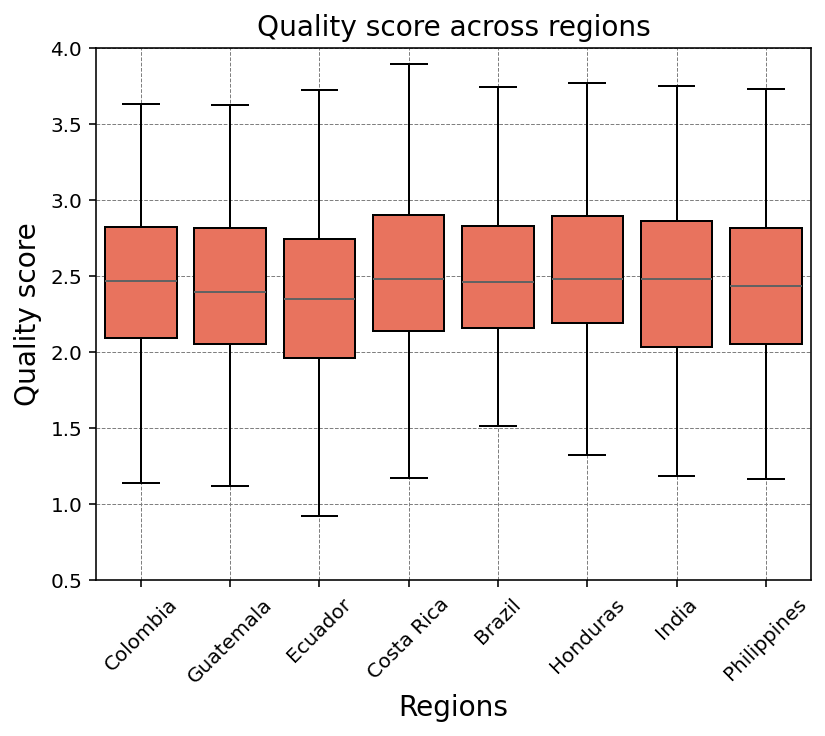

In [15]:
# Plotting the Quality Score distribution across countries

plt.figure( dpi = 144)

box = df.groupby('region')['quality_score']
sns.boxplot(x = df['region'], y = df['quality_score'], color = 'tomato', boxprops = {'edgecolor': 'black'}, whiskerprops={'color': 'black'}, capprops={'color': 'black'})

plt.title('Quality score across regions', fontsize = 14)
plt.xlabel('Regions', fontsize = 14)
plt.ylabel('Quality score', fontsize = 14)

plt.xticks(rotation = 45)
plt.grid(color = 'gray', linewidth = 0.5, linestyle = '--')
plt.ylim(0.5, 4)

plt.show()

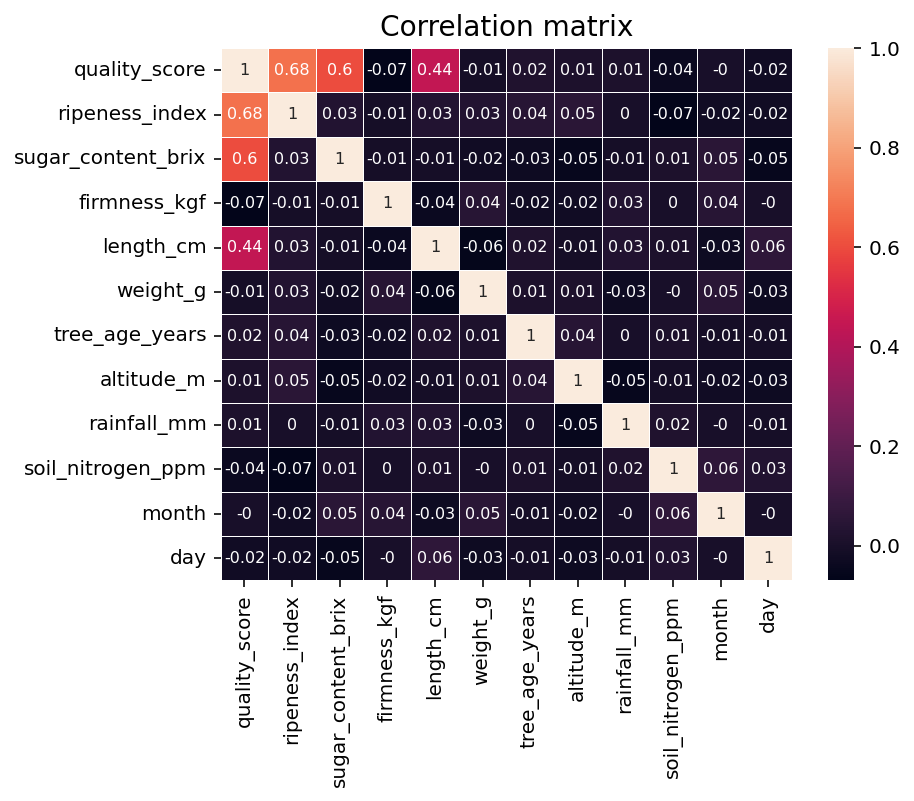

In [16]:
# Creating a copy and dropping categorical variables to calculate correlation matrix
df2 = df
df2 = df2.drop(columns = ['ripeness_category', 'quality_category', 'harvest_date'])

# Creating a heatmap to calculate correlation between the variables using df2
plt.figure(dpi = 144)

sns.heatmap(df2.iloc[:,2:].corr().round(2), annot = True, linewidth = .5, annot_kws = {"size": 8})

plt.title('Correlation matrix', fontsize = 14)

plt.show()

The correlation matrix indicates that quality score is majorly influenced by ripeness_index, sugar_content and length of the bananas.


In [17]:
# Visualizing the features distribution across Quality Category
fig = px.scatter_3d(df, x = 'ripeness_index', y = 'sugar_content_brix', z = 'length_cm', color = 'quality_category', size_max = 10, symbol = 'quality_category')

fig.update_layout(scene = dict( xaxis_title = 'Ripeness Index', yaxis_title = 'Sugar Content (°Brix)', zaxis_title = 'Length (cm)'),
        title = dict(text = "Feature distribution across Quality category", y = 0.95, x = 0.5, xanchor = 'center', yanchor =  'top'),
        title_font = dict(size = 30, color = 'black'),
        width = 750, height = 600,
        legend = dict(title = 'Categories', bordercolor = 'black', borderwidth = 2, x = 0.9, y = 0.97, font = dict(size=20, color = 'black')))

fig.show()

Since, there is a clear relation between the features, we will build Linear Regression model for dependent variable  = Quality score and independent variables = ripeness index, sugar content and length.

In [18]:
# Dividing the data into training and test data
x = df[['ripeness_index', 'sugar_content_brix', 'length_cm']]
y = df['quality_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [19]:
# Standardising the data since scale of values in different variables is different
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
# Implementing linear regression model on the data
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)

In [26]:
# Coefficients of ripeness index, sugar content and length repectively
linear_model.coef_.round(3)

array([0.348, 0.321, 0.233])

In [27]:
linear_model.intercept_.round(3)

2.456

In [22]:
# Using Mean squared error and R^2 values to check the goodness of fit of this model onto our data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f' The mean squared error is : {mse}')
print(f' The r squared value is : {r2}')

 The mean squared error is : 0.008026227795058922
 The r squared value is : 0.9687589047899123


In [23]:
# Calculating adjusted R squared
n = len(y_test)
p = x_test.shape[1]
adj_r_squared = 1 - ((n - 1) / (n - p - 1)) * (1 - r2)
adj_r_squared

0.9682807247611865

The mean squared value is very less and R^2 value of 0.96 is great. This indicates that the model is good fit on our data, since there is minimum error and majority of variance is explained by our model.

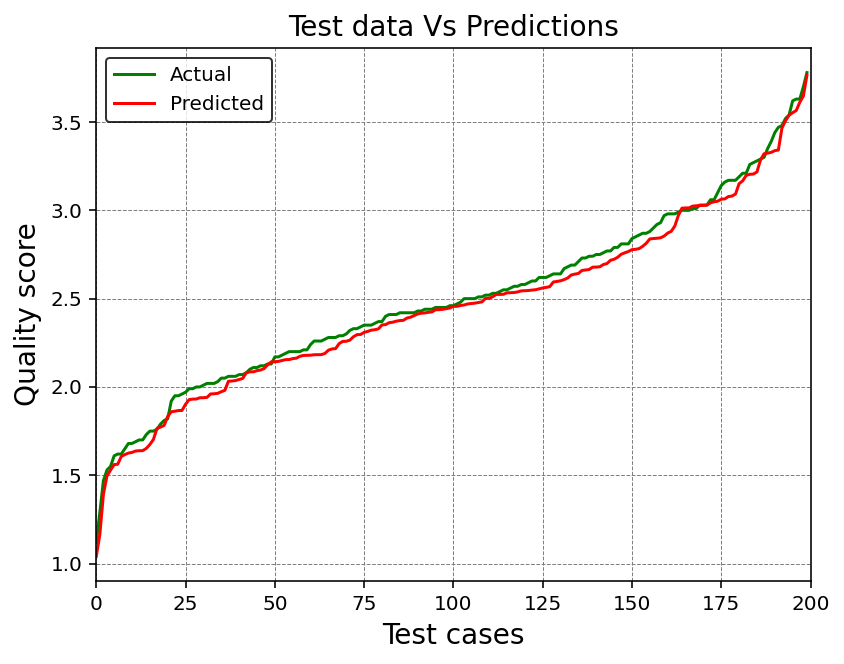

In [24]:
# Making a line plot to show the actual test data outcome and predicted outcomes.
plt.figure(dpi = 144)

plt.plot(np.arange(0, 200, 1), np.sort(y_test), color = 'green', label = 'Actual')
plt.plot(np.arange(0, 200, 1),np.sort(y_pred), color = 'red', label = 'Predicted')


plt.title('Test data Vs Predictions', fontsize = 14)
plt.xlabel('Test cases', fontsize = 14)
plt.ylabel('Quality score', fontsize = 14)
plt.xlim(0, 200)

plt.legend(edgecolor = 'black')
plt.grid(color = 'gray', linewidth = 0.5, linestyle = '--')

plt.show()

Thus, we are able to succesfully build a model to provide Quality score based on certain factors for a banana.